# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Hakan Syukur
- **Email:** hakansyukur138@gmail.com
- **ID Dicoding:** muhammadhakansyukur

## Menentukan Pertanyaan Bisnis

- What has been the trend in the number of bicycle users in 2012?
- Which season has the highest total trips for both casual and registered riders?
- What is the difference in bike rental patterns between member riders and casual riders during weekdays and weekends?
- What weather condition has the highest number of bicycle users according to the rental pattern?

## Import Semua Packages/Library yang Digunakan

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [98]:
day_df = pd.read_csv("https://raw.githubusercontent.com/hakansyukur23/ProjectBikeAnalysis/main/Bike_sharing_dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [99]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [100]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [101]:
day_df.duplicated().sum()

0

In [102]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- data types are suitable and nothing needs to be changed.
- No null data and duplicated data was found

### Cleaning Data

In [103]:
# convert dteday variable ot date data type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [104]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# change type to category
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [105]:
# Filter data for the year 2012
day_2012_df = day_df[day_df['yr'] == '2012']
day_2012_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,Spring,2012,Jan,0,Sun,Holiday,Clear/Partly Cloudy,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,Spring,2012,Jan,1,Mon,Holiday,Clear/Partly Cloudy,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,Spring,2012,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,Spring,2012,Jan,0,Wed,Workingday,Misty/Cloudy,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,Spring,2012,Jan,0,Thu,Workingday,Clear/Partly Cloudy,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [106]:
day_2012_df.to_csv('day_df_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

In [107]:
trend_bike = day_df.groupby(by='yr').agg({
    'cnt': 'mean'
})

trend_bike.head()

<ipython-input-107-cd97342666fc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = day_df.groupby(by='yr').agg({


,cnt
yr,
2011,3405.761644
2012,5599.934426


In [108]:
day_2012_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])

<ipython-input-108-596b8cebbf74>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_2012_df.groupby('season').agg({


casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   430.736264  3100.560440  7836   441  3531.296703
Summer  1369.108696  4840.380435  8362  1027  6209.489130
Fall    1389.797872  5434.446809  8714  4073  6824.244681
Winter   864.820225  4927.044944  8555    22  5791.865169

In [109]:
day_2012_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

<ipython-input-109-681784ac9e21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_2012_df.groupby(by='weekday').agg({


cnt                   
          max   min         mean
weekday                         
Sun      8227  1027  5036.849057
Mon      7525    22  5194.000000
Tue      7767  1013  5553.288462
Wed      8173   441  5843.826923
Thu      7804  2114  5977.750000
Fri      8362  3095  5880.461538
Sat      8714  1301  5732.000000

In [110]:
day_2012_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-110-43bc9fe9905a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_2012_df.groupby(by='weathersit').agg({


cnt                            
                      max   min         mean      sum
weathersit                                           
Clear/Partly Cloudy  8714  1529  6003.734177  1422885
Light Snow/Rain      4639    22  2126.166667    12757
Misty/Cloudy         8362   920  4991.333333   613934

In [111]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-111-87c5b47ac690>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


cnt                  
             max  min         mean
workingday                        
Holiday     8714  605  4330.168831
Workingday  8362   22  4584.820000

**Insight:**
Based on the results above, it shows a comparison of bicycle rentals between working days and weekdays where the most bicycle rentals occur on working days.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-112-032ce30b70be>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = day_2012_df.groupby('mnth')[['casual', 'registered']].sum()


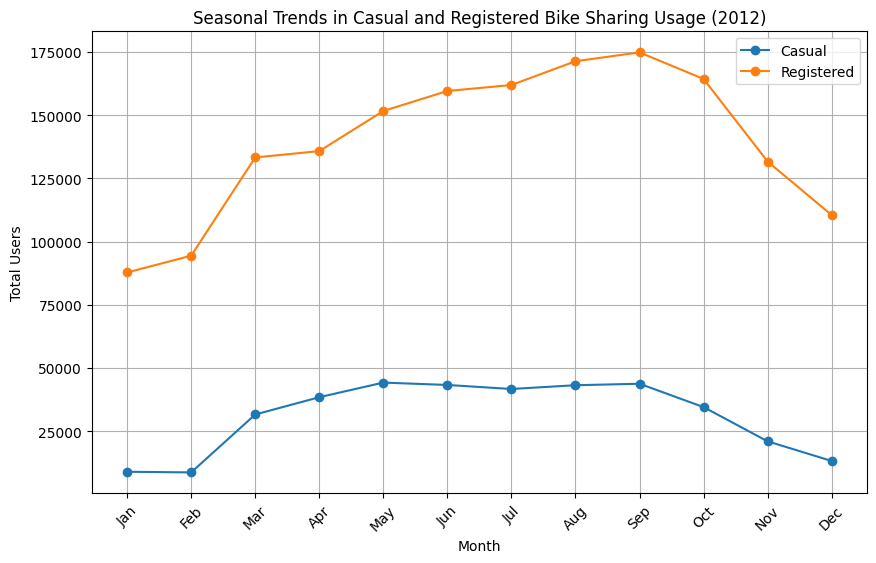

In [112]:
# Group data by month and calculate the total casual and registered users
monthly_trends = day_2012_df.groupby('mnth')[['casual', 'registered']].sum()

# Create a list of months in order
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the monthly_trends DataFrame with the ordered months
monthly_trends = monthly_trends.reindex(ordered_months)

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends['casual'], label='Casual', marker='o')
plt.plot(monthly_trends.index, monthly_trends['registered'], label='Registered', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Seasonal Trends in Casual and Registered Bike Sharing Usage (2012)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- September is the month with the highest total trips for both casual and registered riders.
-January and February marks the lowest months with total trips of the year.

### Pertanyaan 2:

<ipython-input-113-35e040608463>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_pattern = day_2012_df.groupby('season')[['registered', 'casual']].sum().reset_index()


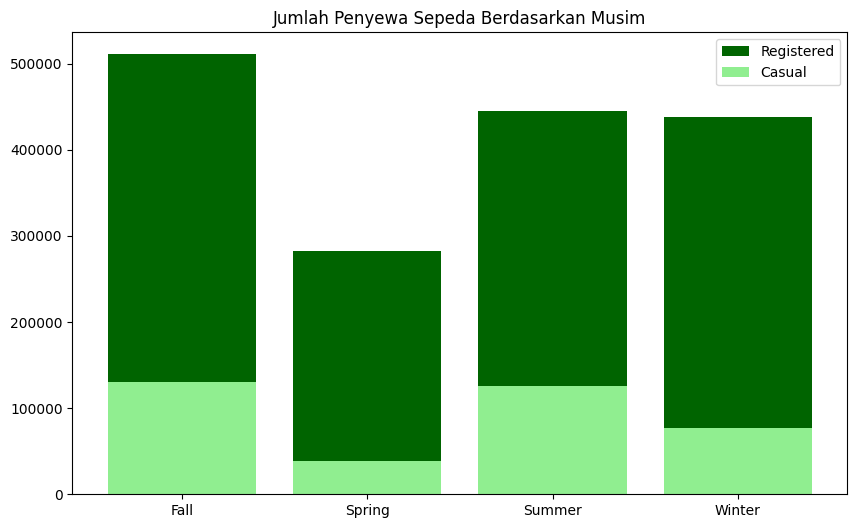

In [113]:
dark_green = '#006400'
light_green = '#90EE90'

# Group data by season and sum registered and casual riders
season_pattern = day_2012_df.groupby('season')[['registered', 'casual']].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color=dark_green
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color=light_green,
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

**Insight:**
Fall is the season with the highest total trips for both casual and registered riders.

### Pertanyaan 3:

<ipython-input-114-a7f23cfda562>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = day_2012_df.groupby('weekday')[['casual', 'registered']].sum()


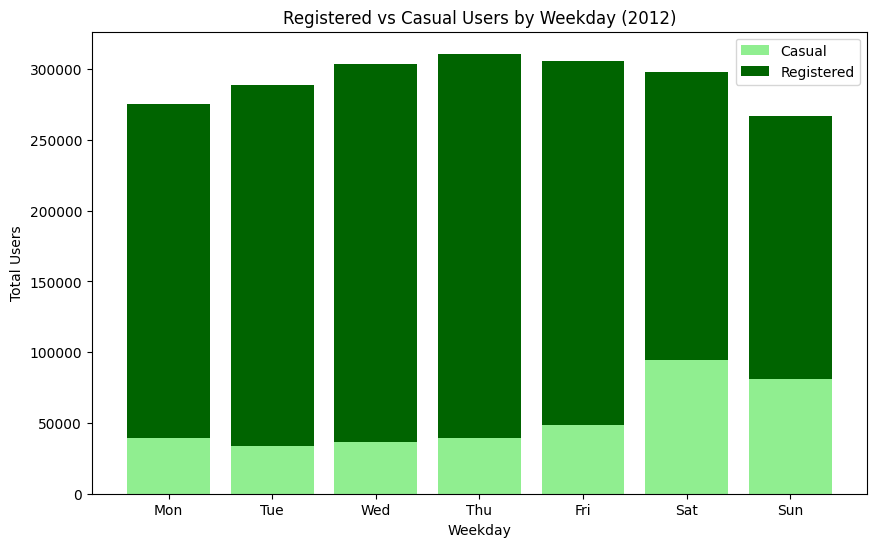

In [114]:
weekday_counts = day_2012_df.groupby('weekday')[['casual', 'registered']].sum()

# Define the order of weekdays for the plot
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts = weekday_counts.reindex(weekday_order)


plt.figure(figsize=(10, 6))

# Bar chart for Casual riders
plt.bar(weekday_counts.index, weekday_counts['casual'], label='Casual', color=light_green)

# Bar chart for Registered riders on top of Casual riders
plt.bar(weekday_counts.index, weekday_counts['registered'], bottom=weekday_counts['casual'], label='Registered', color=dark_green)

plt.xlabel('Weekday')
plt.ylabel('Total Users')
plt.title('Registered vs Casual Users by Weekday (2012)')
plt.legend()
plt.show()

**Insight:**
- Member riders dominates the trip during weekday. The number of trips gradually decrease after Tuesday, and reach its lowest on Sunday.
-Casual riders have relatively low usage during weekdays, but their trips significantly increase over the weekend.
-In conclusion, member riders tend to rent bikes on weekdays, while casual riders prefer to rent bikes on weekends.


### Pertanyaan 4:

<ipython-input-115-f90485368eca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_2012_df.groupby('weathersit')[['casual', 'registered']].sum()


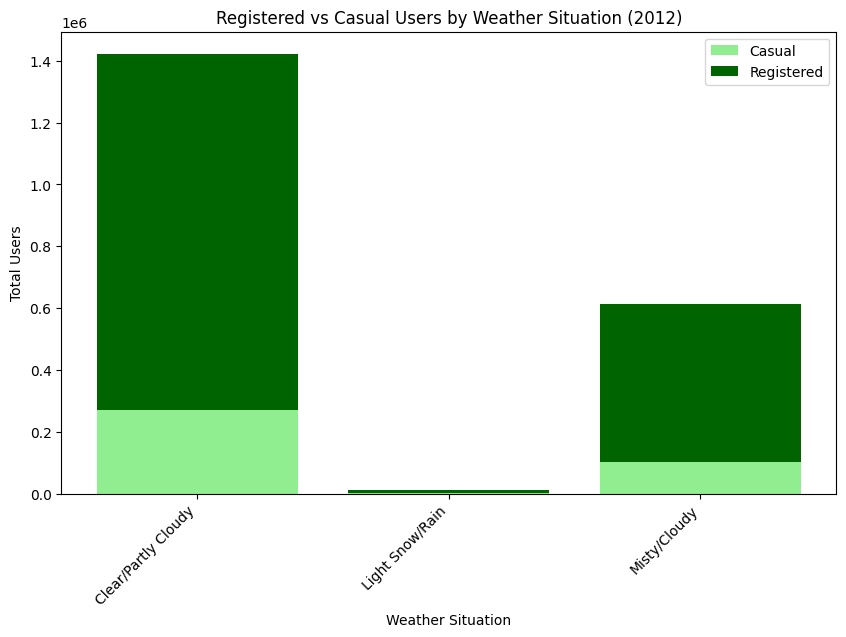

In [115]:
weather_counts = day_2012_df.groupby('weathersit')[['casual', 'registered']].sum()

plt.figure(figsize=(10, 6))

# Bar chart for Casual riders
plt.bar(weather_counts.index, weather_counts['casual'], label='Casual', color=light_green)

# Bar chart for Registered riders on top of Casual riders
plt.bar(weather_counts.index, weather_counts['registered'], bottom=weather_counts['casual'], label='Registered', color=dark_green)

plt.xlabel('Weather Situation')
plt.ylabel('Total Users')
plt.title('Registered vs Casual Users by Weather Situation (2012)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.show()

**Insight:**
The pattern of bicycle rentals by weather shows that the most bicycle users are during clear weather.

## Conclusion

- Trend in the number of bicycle users in 2012: The number of bicycle users in
2012 showed fluctuations throughout the year, with clear seasonal trends. The peak months generally occurred in warmer seasons like spring and summer, while the number of rentals decreased during the colder months.

- Season with the highest total trips for both casual and registered riders: Fall (autumn) is the season with the highest total trips for both casual and registered riders, indicating a strong preference for bike rentals during this season.

- Difference in bike rental patterns between member riders and casual riders during weekdays and weekends: Member riders dominate bike rentals during weekdays, with a gradual decrease in trips after Tuesday, reaching the lowest point on Sundays. Casual riders have relatively low usage during weekdays, but their trips significantly increase over the weekend. In conclusion, member riders tend to rent bikes on weekdays, while casual riders prefer weekends.

- Weather condition with the highest number of bicycle users: Clear weather is the condition with the highest number of bicycle users, showing that good weather positively influences the number of bike rentals.